# Data Description, Data Normalization and Outliers Detection

## 1 Data Description
Import libraries and read data.

In [2]:
import pandas as pd

newdata = pd.read_csv('DatasaurusDozen.tsv', sep='\t')

#### Take a look at Data

This is the first thing you should do when you start to work on any dataset. Just one line of code!

In [4]:
newdata.head()

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


#### Descriptive Statistics

Observe data from statistics.

In [5]:
newdata.describe()

,x,y
count,1846.000000,1846.000000
mean,54.265695,47.835099
std,16.713001,26.847766
min,15.560750,0.015119
25%,41.073403,22.561073
50%,52.591269,47.594450
75%,67.277845,71.810778
max,98.288123,99.694680


In [6]:
newdatasets = newdata.groupby('dataset')
newdatasets.describe()

x                                                         \
            count       mean        std        min        25%        50%   
dataset                                                                    
away        142.0  54.266100  16.769825  15.560750  39.724115  53.340296   
bullseye    142.0  54.268730  16.769239  19.288205  41.627968  53.842088   
circle      142.0  54.267320  16.760013  21.863581  43.379116  54.023213   
dino        142.0  54.263273  16.765142  22.307700  44.102600  53.333300   
dots        142.0  54.260303  16.767735  25.443526  50.359707  50.976768   
h_lines     142.0  54.261442  16.765898  22.003709  42.293828  53.069678   
high_lines  142.0  54.268805  16.766704  17.893499  41.535981  54.168689   
slant_down  142.0  54.267849  16.766759  18.109472  42.890931  53.135159   
slant_up    142.0  54.265882  16.768853  20.209778  42.810866  54.261345   
star        142.0  54.267341  16.768959  27.024603  41.034210  56.534732   
v_lines     142.0  54.269927  16.769959  30.449654  49.964506  50.362890   
wide_lines  142.0  54.266916  16.770000  27.439632  35.522449  64.550226   
x_shape     142.0  54.260150  16.769958  31.106867  40.091656  47.136458   

                                      y                                   \
                  75%        max  count       mean        std        min   
dataset                                                                    
away        69.146597  91.639961  142.0  47.834721  26.939743   0.015119   
bullseye    64.798900  91.735539  142.0  47.830823  26.935727   9.691547   
circle      64.972672  85.664761  142.0  47.837717  26.930036  16.326546   
dino        64.743600  98.205100  142.0  47.832253  26.935403   2.948700   
dots        75.197363  77.954435  142.0  47.839829  26.930192  15.771892   
h_lines     66.768274  98.288123  142.0  47.830252  26.939876  10.463915   
high_lines  63.952667  96.080519  142.0  47.835450  26.939998  14.913962   
slant_down  64.469989  95.593416  142.0  47.835896  26.936105   0.303872   
slant_up    64.488010  95.260528  142.0  47.831496  26.938608   5.645777   
star        68.711493  86.435897  142.0  47.839545  26.930275  14.365590   
v_lines     69.504068  89.504851  142.0  47.836988  26.937684   2.734760   
wide_lines  67.453672  77.915874  142.0  47.831602  26.937902   0.217006   
x_shape     71.856923  85.446186  142.0  47.839717  26.930002   4.577661   

                                                        
                  25%        50%        75%        max  
dataset                                                 
away        24.625892  47.535269  71.803148  97.475771  
bullseye    26.244735  47.382937  72.532852  85.876229  
circle      18.349610  51.025022  77.782382  85.578134  
dino        25.288450  46.025600  68.525675  99.487200  
dots        17.107141  51.299291  82.881589  94.249328  
h_lines     30.479911  50.473527  70.349471  90.458936  
high_lines  22.920843  32.499203  75.940022  87.152208  
slant_down  27.840858  46.401314  68.439430  99.644179  
slant_up    24.756248  45.292238  70.855844  99.579591  
star        20.374135  50.110554  63.548584  92.214989  
v_lines     22.752884  47.113616  65.845391  99.694680  
wide_lines  24.346941  46.279331  67.568127  99.283764  
x_shape     23.470809  39.876211  73.609634  97.837615

How about the Pearson correlation between x and y.

In [8]:
newdatasets[['x', 'y']].corr()

x         y
dataset                         
away       x  1.000000 -0.064128
           y -0.064128  1.000000
bullseye   x  1.000000 -0.068586
           y -0.068586  1.000000
circle     x  1.000000 -0.068343
           y -0.068343  1.000000
dino       x  1.000000 -0.064472
           y -0.064472  1.000000
dots       x  1.000000 -0.060341
           y -0.060341  1.000000
h_lines    x  1.000000 -0.061715
           y -0.061715  1.000000
high_lines x  1.000000 -0.068504
           y -0.068504  1.000000
slant_down x  1.000000 -0.068980
           y -0.068980  1.000000
slant_up   x  1.000000 -0.068609
           y -0.068609  1.000000
star       x  1.000000 -0.062961
           y -0.062961  1.000000
v_lines    x  1.000000 -0.069446
           y -0.069446  1.000000
wide_lines x  1.000000 -0.066575
           y -0.066575  1.000000
x_shape    x  1.000000 -0.065583
           y -0.065583  1.000000

#### Visualization

Statistics cannot tell you everything. Try to visualize these datasets. 

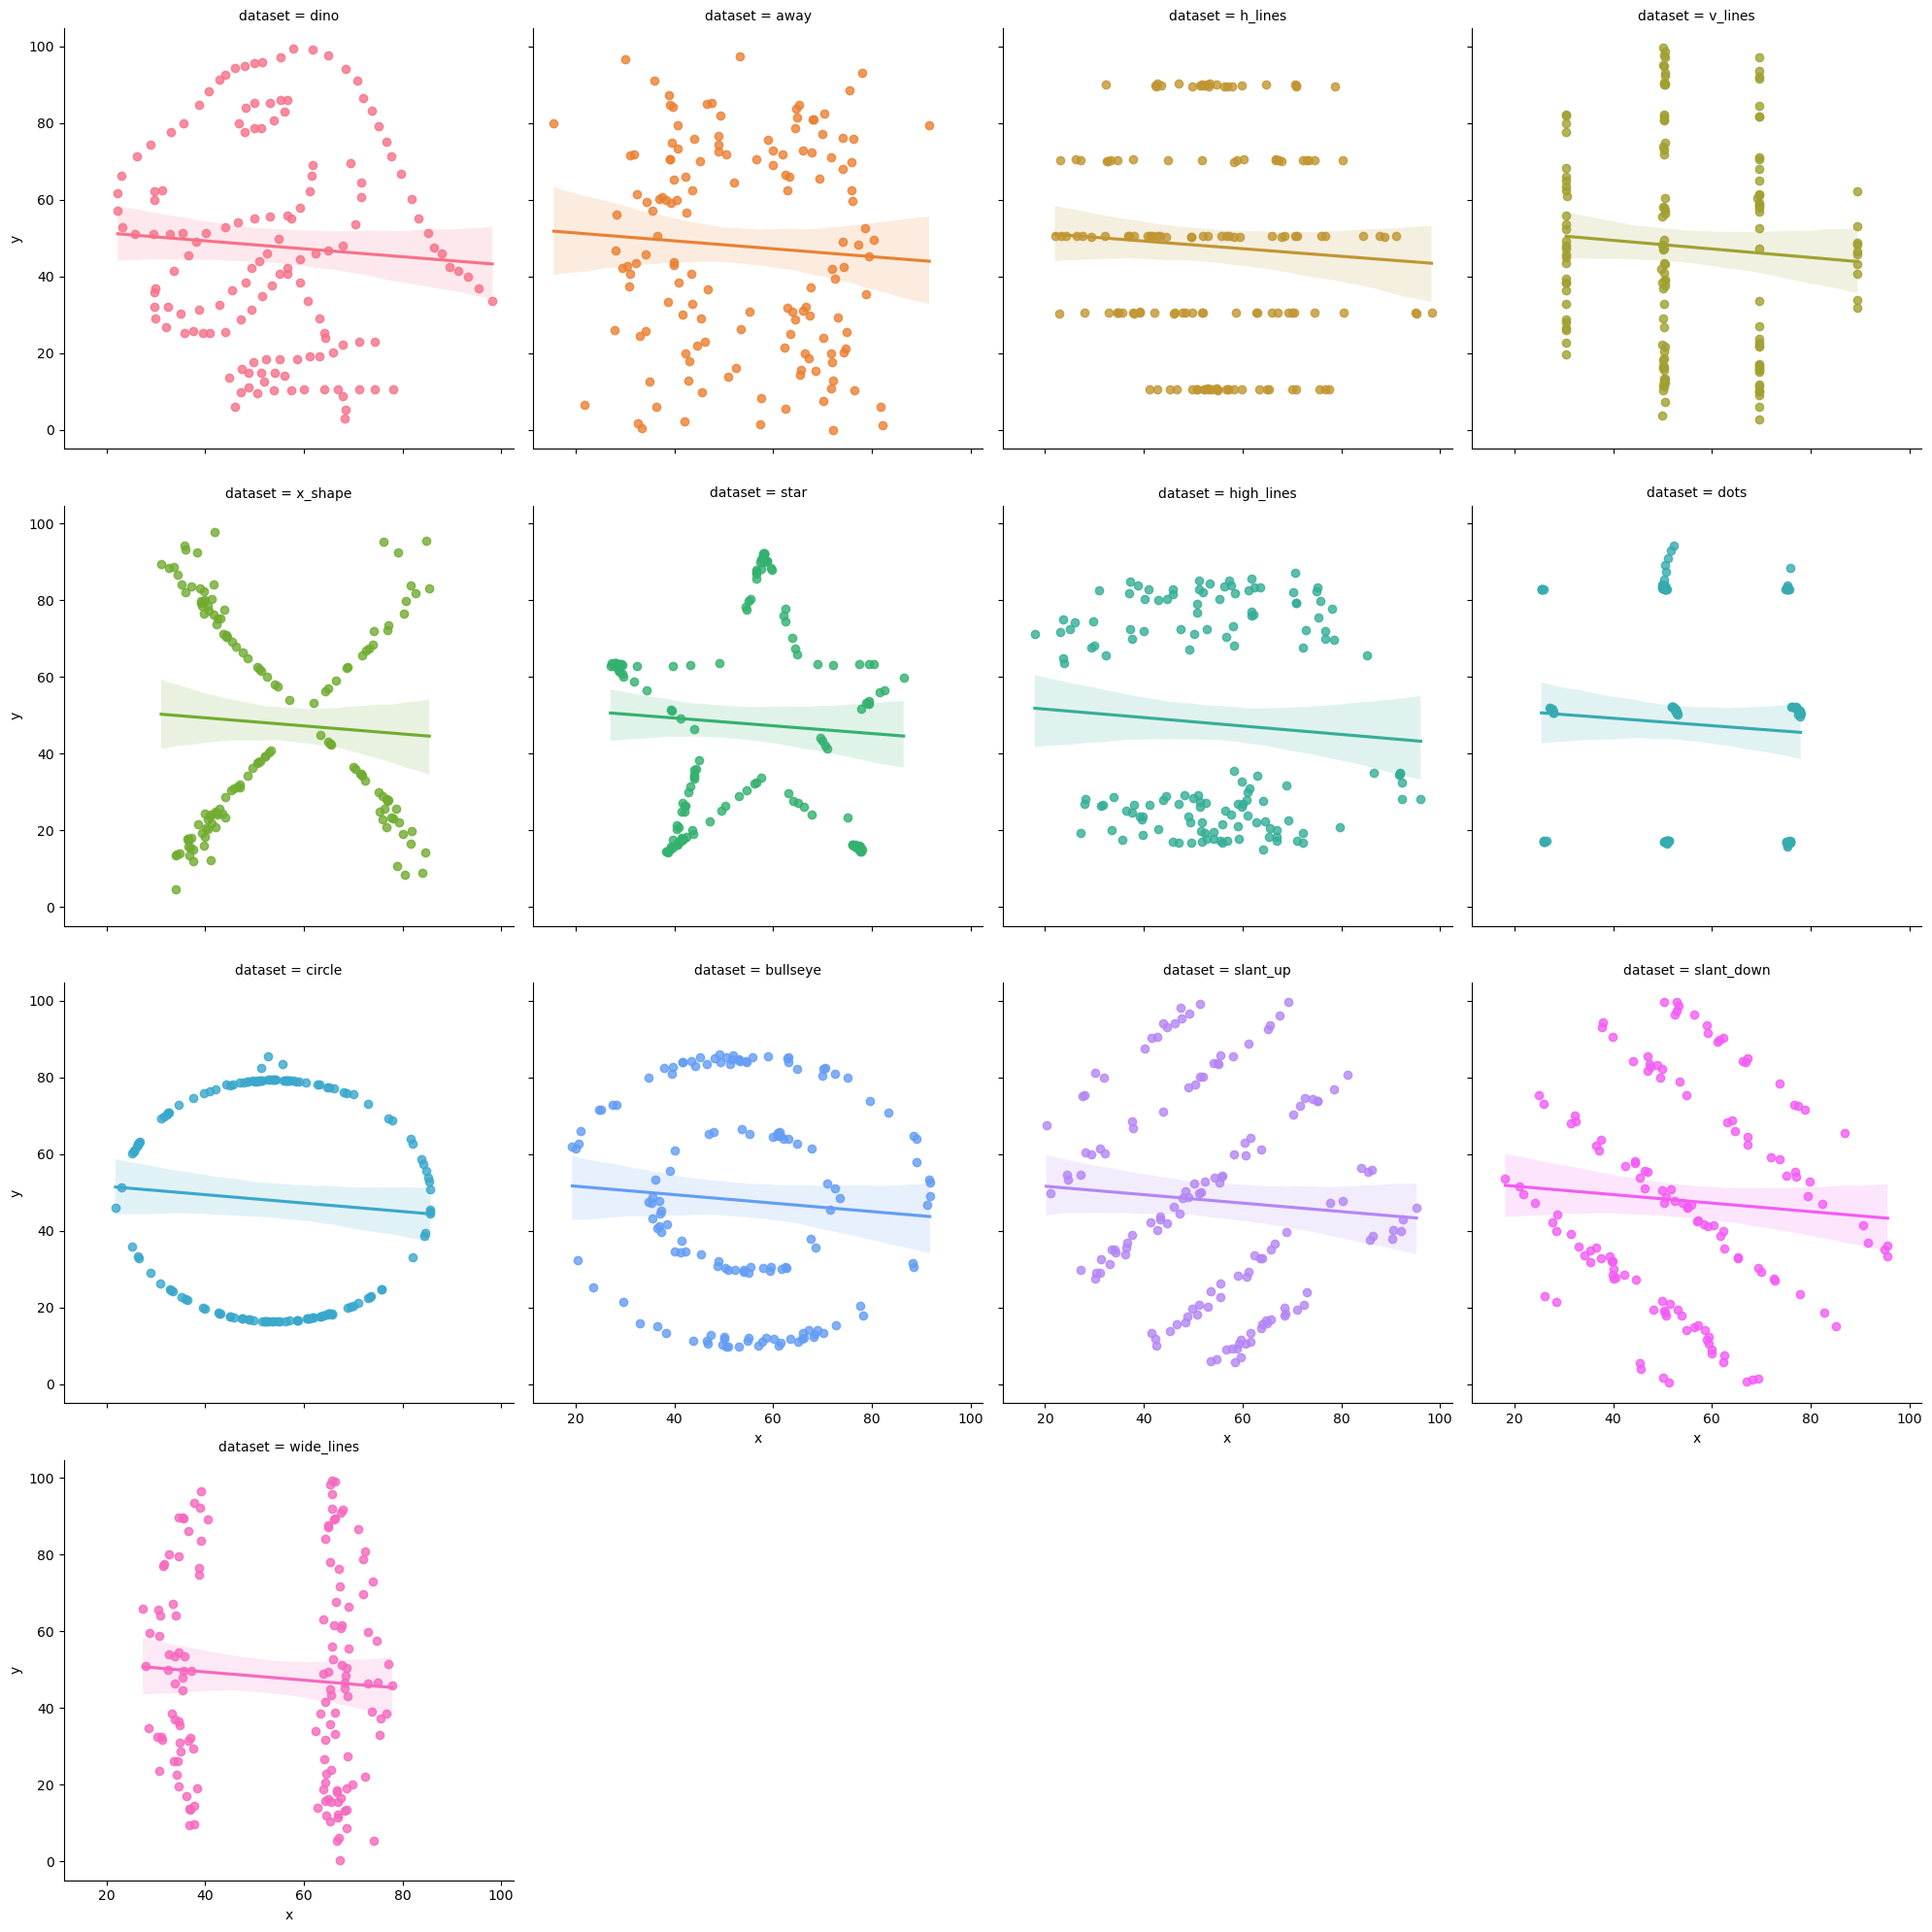

In [12]:
import seaborn as sns

sns.lmplot(data = newdata,
           x = 'x',
           y = 'y',
           col = 'dataset', # 把不同dataset的样本点放在一个图里
           hue = 'dataset', 
           col_wrap = 4)

## 2 Data Normalization 

We use the `scikit-learn` library to perform normalization. The `scikit-learn` library can be used also to deal with missing values, as explained in my previous post.

All the `scikit-learn` operations described in this tutorial follow the following steps:
* select a preprocessing methodology
* fit it through the `fit()` function
* apply it to data through the `transform()` function.

The `scikit-learn` library works only with arrays, thus when performing every operation, a dataframe column must be converted to an array. This can be achieved through the `numpy.array()` function, which receives the dataframe column as input. In addition, the `fit()` function receives as input an array of arrays, each representing a sample of the dataset. Thus the `reshape()` function could be used to convert a standard array to an array of arrays.

#### Data Import
As example dataset, in this tutorial we consider the dataset provided by the Italian Protezione Civile, related to the number of COVID-19 cases registered since the beginning of the COVID-19 pandemic. The dataset is updated daily and can be downloaded from [this link](https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv).

First of all, we need to import the Python `pandas` library and read the dataset through the `read_csv()` function. Then we can drop all the columns with `NaN` values. This is done through `dropna()` function. 

In [13]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')


In [15]:
df.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df = df.dropna(axis = 1)
df

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,0,18,0,0,18,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23158,2023-03-02T17:00:00,ITA,19,Sicilia,38.115697,13.362357,280,21,301,3869,4170,204,206,1800871,12692,1817733,16524409
23159,2023-03-02T17:00:00,ITA,9,Toscana,43.769231,11.255889,186,8,194,8825,9019,-575,224,1569371,11574,1589964,16633160
23160,2023-03-02T17:00:00,ITA,10,Umbria,43.106758,12.388247,89,3,92,1045,1137,12,93,434715,2449,438301,5020315
23161,2023-03-02T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,4,0,4,527,531,-3,3,49350,567,50448,588950


#### Min Max
 Min Max converts every value of a column into a number between 0 and 1. The new value is calculated as the difference between the current value and the min value, divided by the range of the column values. 
 
 In `sklearn` we use the `MinMaxScaler` class. 

Select the numerical attributes.

In [18]:
numeric = df.select_dtypes(include = np.number)
numeric_columns = numeric.columns
newdf = df[numeric_columns]
newdf

,codice_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,13,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5
1,17,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0
2,18,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1
3,15,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10
4,8,44.494367,11.341721,10,2,12,6,18,0,18,0,0,18,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23158,19,38.115697,13.362357,280,21,301,3869,4170,204,206,1800871,12692,1817733,16524409
23159,9,43.769231,11.255889,186,8,194,8825,9019,-575,224,1569371,11574,1589964,16633160
23160,10,43.106758,12.388247,89,3,92,1045,1137,12,93,434715,2449,438301,5020315
23161,2,45.737503,7.320149,4,0,4,527,531,-3,3,49350,567,50448,588950


sklearn基本流程：定义，丢数据fit，transform

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(newdf)
X_scaler = scaler.transform(newdf)

In [23]:
X_scaler

array([[5.71428571e-01, 5.05213259e-01, 6.36655533e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.10881903e-07],
       [7.61904762e-01, 3.01035599e-01, 8.88740510e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.09523810e-01, 9.42644229e-02, 9.71408952e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.21763807e-08],
       ...,
       [4.28571429e-01, 5.95333623e-01, 5.30845516e-01, ...,
        5.37556521e-02, 1.06424732e-01, 1.11332417e-01],
       [4.76190476e-02, 9.09128742e-01, 0.00000000e+00, ...,
        1.24456736e-02, 1.22493786e-02, 1.30607794e-02],
       [1.90476190e-01, 8.73034860e-01, 5.25629876e-01, ...,
        3.65951095e-01, 6.53834863e-01, 8.22724341e-01]])

#### z-score
Z-Score converts every value of a column into a number around 0. Typical values obtained by a z-score transformation range from -3 and 3. The new value is calculated as the difference between the current value and the average value, divided by the standard deviation. 

In `sklearn` we can use the `StandardScaler` function. 

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(newdf)
X_scaler = scaler.transform(newdf)

In [25]:
X_scaler

array([[ 0.18216352, -0.27928163,  0.44095742, ..., -0.71345909,
        -0.62561236, -0.67585236],
       [ 0.81973582, -0.96706879,  1.34609371, ..., -0.71345909,
        -0.62561236, -0.67585297],
       [ 0.9791289 , -1.66359239,  1.64292301, ..., -0.71345909,
        -0.62561236, -0.67585285],
       ...,
       [-0.29601571,  0.02429531,  0.06103599, ..., -0.39391068,
         0.0151837 , -0.05642734],
       [-1.57116032,  1.08133676, -1.84501787, ..., -0.63947626,
        -0.55185738, -0.60318607],
       [-1.09298109,  0.95975192,  0.04230871, ...,  1.46192317,
         3.31120565,  3.90157884]])


## 3 Outliers Detection
In this tutorial, I exploit the `sklearn`, `matplotlib` and `seaborn` Python library. 

- You can install `sklearn` by running
`pip install -U scikit-learn`. 
The full documentation of the `sklearn` library can be found at [this link](https://scikit-learn.org/stable/index.html). 

- You can install `matplotlib` by running `pip install matplotlib`. 
The full documentation of the `matplotlib` library can be found at [this link](https://matplotlib.org/). 

- You can install `seaborn` by running `pip install seaborn`. 
The full documentation of the `seaborn` library can be found at [this link](https://seaborn.pydata.org/). 



#### Build the dataset
Firstly, I build the dataset from scratch: I build a sinusoidal wave and then I perturbate it by manually adding three outliers. I exploit the `sin()` function of the `numpy` library to build the sinusoidal wave.

In [2]:
import numpy as np

X = 50 * np.arange(0, 100)
Y = np.sin(X)

Before perturbating the wave, I plot it through the `matplotlib` library.

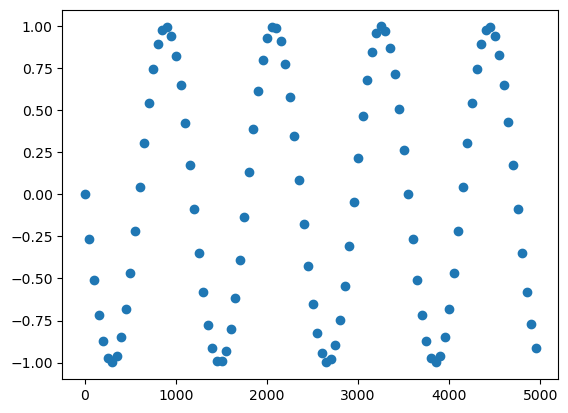

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.show()

Now I perturbate the sinusoidal wave, by modifing some Y values. Finally, I have 3 outliers.

In [4]:
Y[5] = 1.25
Y[50] = -2
Y[85] = 1.4

I plot the wave after the perturbation. The presence of the 3 outliers is clear.

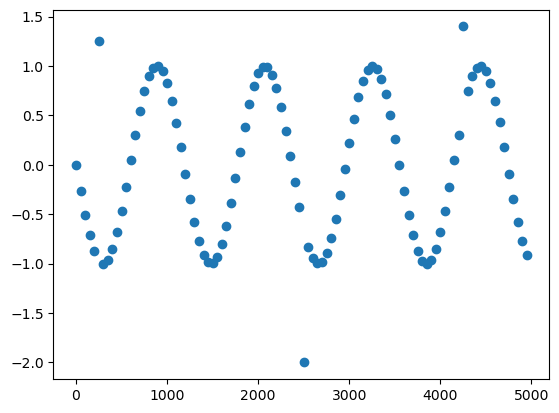

In [5]:
plt.scatter(X, Y)
plt.show()

#### LOF (Local Outlier Factor)
In this tutorial I exploit the `LOF (Local Outlier Factor)` model. Firstly, I reshape the `Y` data into format which can be given as input to the `LocalOutlierFactor()` model. Then, I build the `LocalOutlierFactor` model and I fit it with `Y`. Finally, I compute the outlier scores through the `fit_predict()` function. 

In [25]:
Y = Y.reshape(-1, 1) # Y = Y[:,np.newaxis]

In [26]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor()
clf.fit_predict(Y)
outlier_scores = clf.negative_outlier_factor_ # 返回的是反的LOF值，越小越有可能是离群点

In [28]:
outlier_scores

array([-1.00898929, -1.02010968, -1.07081451, -1.03092317, -1.00257122,
       -1.7754284 , -1.02010904, -0.99526439, -0.97114104, -1.06630089,
       -1.04962457, -1.01402083, -1.0132861 , -1.03616296, -1.12076083,
       -1.00743257, -1.01003106, -0.98860711, -1.00060247, -0.99496428,
       -0.96572152, -1.11465777, -1.08334547, -1.02250648, -1.00789552,
       -1.02660871, -1.09515387, -0.94146349, -1.00921257, -1.00587772,
       -1.01301463, -1.00398491, -0.94759649, -1.11259828, -1.05031558,
       -1.01034423, -1.02488971, -1.07690491, -1.12243209, -0.95310237,
       -0.99947751, -0.99599763, -0.99089858, -1.00445747, -0.95574299,
       -1.13611738, -1.05549416, -1.02147276, -1.02297019, -1.05389425,
       -6.19265204, -0.95511339, -0.99937468, -1.01771844, -1.00119628,
       -1.01490596, -0.98542262, -1.09753879, -1.02970008, -1.0139942 ,
       -1.02516794, -1.09101975, -1.08527066, -0.97324164, -0.99104875,
       -1.0028798 , -0.98858965, -1.00817589, -1.05009832, -1.12

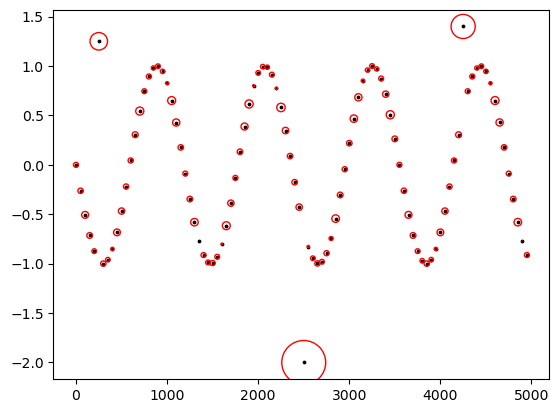

In [29]:
plt.scatter(X, Y, color = 'k', s = 3.0)
# 这里标准化是反向的，因为之前计算的LOF的值就是反的
radius = (outlier_scores.max() - outlier_scores)/(outlier_scores.max() - outlier_scores.min())
plt.scatter(X, Y,
            s = radius * 1000, # 让大小差异更明显
            edgecolors = 'r',
            facecolors = 'none') # 半径越大，越异常
plt.show()

#### Try to detect outliers via LOF by yourself

Some data are generated below.

In [30]:
X_in = 0.3 * np.random.randn(100, 2)
X_out = np.random.uniform(low = -5, high = 5, size = (20, 2))

In [31]:
X_in[:5]

array([[-1.68589603e-01,  5.66104920e-02],
       [-1.09637642e-01,  6.19524132e-01],
       [-1.56890378e-04, -1.26606254e-01],
       [-3.46482315e-02, -4.03386220e-01],
       [ 1.57320039e-01, -4.76960033e-01]])

In [32]:
X_out[:5]

array([[-3.77307641,  1.22958945],
       [ 3.80442232,  0.96018147],
       [-3.00072757,  4.95946684],
       [ 3.72259702, -4.35777517],
       [-2.7713551 , -3.79378743]])

In [33]:
data = np.concatenate((X_in, X_out))

In [34]:
data.shape

(120, 2)

First, Build the `LocalOutlierFactor` model and fit it with the generated data.
Second, compute the outlier scores through the `fit_predict()` function. 
Finally, visulize the data in scatter plot, and plot circles with radius proportional to the outlier scores.

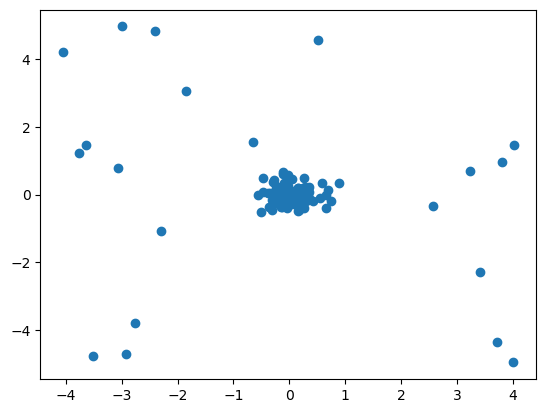

In [37]:
plt.scatter(data[:,0],data[:,1])
plt.show()

In [38]:
clf = LocalOutlierFactor()
clf.fit_predict(data)
outlier_scores = clf.negative_outlier_factor_ # 返回的是反的LOF值，越小越有可能是离群点

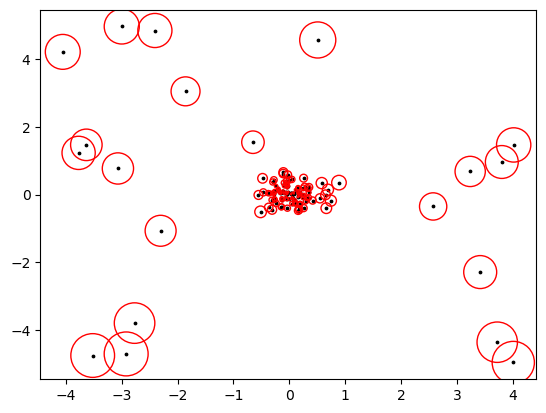

In [41]:
plt.scatter(data[:,0],data[:,1], color = 'k', s = 3.0)
# 这里标准化是反向的，因为之前计算的LOF的值就是反的
radius = (outlier_scores.max() - outlier_scores)/(outlier_scores.max() - outlier_scores.min())
plt.scatter(data[:,0],data[:,1], 
            s = radius * 1000, # 让大小差异更明显
            edgecolors = 'r',
            facecolors = 'none') # 半径越大，越异常
plt.show()